In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps

# Распределение Пуассона
## Выборочное среднее и выборочная дисперсия

In [2]:
def PoissonDistribution(mu, x):
    '''
    This fuction returns an array of Poisson destribution in the points of "x" array.
    mu - is a paramter > 0
    x - array of real numbers (optional: np.array(..., dtype=float32))
    '''

    X = np.zeros_like(x)
    for i in range(X.shape[0]):
        X[i] = (mu**x[i])/np.math.factorial(int(x[i]))*np.exp(-mu)
    return X

def random_poisson(mu, size=1):
    '''
    This fuction generates an array of random points which are distributed as Poisson.
    mu - is a parameter of shape.
    '''
    poisson_array = np.zeros(size, dtype='f8')
    for k in range(size):
        a = np.exp(-mu)
        b = 1
        i = 0
        u = np.random.uniform(0. , 1.)
        b = b*u
        while b>=a:
            u = np.random.uniform(0., 1.)
            b = b*u
            i+=1
        poisson_array[k] = i
        
    return poisson_array

def sample_mean(variables):
    n = variables.shape[0]
    s = np.sum(variables)
    s_m = s/n
    return s_m

def sample_variance(variables, samp_mean):
    n = variables.shape[0]
    variables = (variables - samp_mean)**2
    s = np.sum(variables)
    s_v = s/n
    return s_v

In [3]:
np.random.seed(12345678) # пусть, по умолчанию стартовое значение генератора равно 12345678
poisson_data_5 = random_poisson(2, 5)
print(poisson_data_5)
poisson_data_10 = random_poisson(2, 10)
print(poisson_data_10)

[2. 1. 1. 3. 0.]
[2. 1. 2. 3. 7. 2. 3. 1. 2. 0.]


In [4]:
# найдем выборочное среднее и выборочную дисперсию для двух выборок (самостоятельно)
print('С помощью двух функций:')
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_5, sample_mean(poisson_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_10, sample_mean(poisson_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_5, sample_variance(poisson_data_5, sample_mean(poisson_data_5))))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_10, sample_variance(poisson_data_10, sample_mean(poisson_data_10))))

С помощью двух функций:
Выборочное среднее для выборки [2. 1. 1. 3. 0.] = 1.4
Выборочное среднее для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 2.3
Выборочная дисперсия для выборки [2. 1. 1. 3. 0.] = 1.04
Выборочная дисперсия для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 3.21


In [5]:
# в библиотеке numpy существует два метода mean&var, которые находят выборочное среднее и выборочную дисперсию
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_5, np.mean(poisson_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_10, np.mean(poisson_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_5, np.var(poisson_data_5)))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_10, np.var(poisson_data_10)))

Выборочное среднее для выборки [2. 1. 1. 3. 0.] = 1.4
Выборочное среднее для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 2.3
Выборочная дисперсия для выборки [2. 1. 1. 3. 0.] = 1.04
Выборочная дисперсия для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 3.21


## Оценка времени

In [6]:
%%timeit
sample_mean(random_poisson(2, 100000))

681 ms ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
np.mean(random_poisson(2, 100000))

577 ms ± 58.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
mean = sample_mean(random_poisson(2, 100000))

In [9]:
%%timeit
sample_variance(random_poisson(2, 100000), mean)

566 ms ± 55.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
np.var(random_poisson(2, 100000))

568 ms ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Ставки на спорт

In [11]:
import pandas as pd

In [62]:
# выберем матч, который хотелось бы предугадать (0-379)
num_match = 379
stats = pd.read_csv('Football_stats/PL1819.csv', sep=',')
real_bets = (stats.iloc[num_match]['B365H'], stats.iloc[num_match]['B365D'], stats.iloc[num_match]['B365A'])
Home_Team = stats.iloc[num_match]['HomeTeam']
Away_Team = stats.iloc[num_match]['AwayTeam']
stats = stats.drop(stats.columns[range(10, 62)], axis=1)
print(real_bets, Home_Team, Away_Team)

(2.25, 3.75, 3.2) Watford West Ham


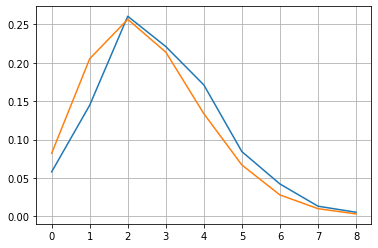

In [63]:
# проверка распределения
g = {}
for i in range(380):
    s = stats.loc[i]['FTHG']+stats.loc[i]['FTAG']
    if s not in g:
        g[s] = 0
    g[s]+=1
q = sorted(g.items(), key=lambda x: x[0])
X = np.zeros(len(q))
Y = np.zeros(len(q))
for i in range(len(q)):
    X[i] = q[i][0]
    Y[i] = q[i][1]/380
plt.plot(X,Y);
plt.grid();
plt.plot(np.linspace(0,8,9), PoissonDistribution(2.5, np.linspace(0,8,9)))

In [64]:
def Stats_Per_Team(stats):
    teams = set(stats['HomeTeam'])
    goals_per_team = {}
    for team in teams:
        goals = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='f8')#забили всего, пропустили всего, забили дома, забили на выезде, пропустили дома, пропустили на выезде
        for i in range(380):
            if stats.loc[i][2] == team:
                goals[0] += stats.loc[i][4]
                goals[1] += stats.loc[i][5]
                goals[2] += stats.loc[i][4]
                goals[4] += stats.loc[i][5]
            if stats.loc[i][3] == team:
                goals[0] += stats.loc[i][5]
                goals[1] += stats.loc[i][4]
                goals[3] += stats.loc[i][5]
                goals[5] += stats.loc[i][4]
        goals_per_team[team] = goals
    new_stats = pd.DataFrame(goals_per_team.values(), 
                         index=goals_per_team.keys(), columns=['TotIn', 'TotOut', 'InHome', 'InAway', 
                                                               'OutHome', 'OutAway', 'WMeanInHome', 'WMeanInAway', 
                                                               'WMeanOutHome', 'WMeanOutAway'])
    mean_in_home = np.sum(new_stats['InHome'])/380
    mean_in_away = np.sum(new_stats['InAway'])/380
    for i in range(20):
        new_stats.iloc[i]['WMeanInHome'] = new_stats.iloc[i]['InHome']/19/mean_in_home
        new_stats.iloc[i]['WMeanInAway'] = new_stats.iloc[i]['InAway']/19/mean_in_away
        new_stats.iloc[i]['WMeanOutHome'] = new_stats.iloc[i]['OutHome']/19/mean_in_away
        new_stats.iloc[i]['WMeanOutAway'] = new_stats.iloc[i]['OutAway']/19/mean_in_home
    return new_stats

new_stats = Stats_Per_Team(stats)
mean_in_home = np.sum(new_stats['InHome'])/380
mean_in_away = np.sum(new_stats['InAway'])/380
new_stats

,TotIn,TotOut,InHome,InAway,OutHome,OutAway,WMeanInHome,WMeanInAway,WMeanOutHome,WMeanOutAway
Liverpool,89.0,22.0,55.0,34.0,10.0,12.0,1.845638,1.428571,0.420168,0.402685
Bournemouth,56.0,70.0,30.0,26.0,25.0,45.0,1.006711,1.092437,1.050420,1.510067
Huddersfield,22.0,76.0,10.0,12.0,31.0,45.0,0.335570,0.504202,1.302521,1.510067
Tottenham,67.0,39.0,34.0,33.0,16.0,23.0,1.140940,1.386555,0.672269,0.771812
Crystal Palace,51.0,53.0,19.0,32.0,23.0,30.0,0.637584,1.344538,0.966387,1.006711
Everton,54.0,46.0,30.0,24.0,21.0,25.0,1.006711,1.008403,0.882353,0.838926
Watford,52.0,59.0,26.0,26.0,28.0,31.0,0.872483,1.092437,1.176471,1.040268
Newcastle,42.0,48.0,24.0,18.0,25.0,23.0,0.805369,0.756303,1.050420,0.771812
Wolves,47.0,46.0,28.0,19.0,21.0,25.0,0.939597,0.798319,0.882353,0.838926
Arsenal,73.0,51.0,42.0,31.0,16.0,35.0,1.409396,1.302521,0.672269,1.174497


In [65]:
def match(team_1, team_2):
    k = 8
    lam_1 = PoissonDistribution(new_stats.loc[team_1]['WMeanInHome']*new_stats.loc[team_2]['WMeanOutAway']*mean_in_home, np.linspace(0,k,k+1))
    lam_2 = PoissonDistribution(new_stats.loc[team_2]['WMeanInAway']*new_stats.loc[team_1]['WMeanOutHome']*mean_in_away, np.linspace(0,k,k+1))
    d1 = {}
    d2 = {}
    for i in range(k):
        d1[i] = lam_1[i]
        d2[i] = lam_2[i]
    df = pd.DataFrame({team_1:d1, team_2:d2})
    return df

In [66]:
final_score = match(Home_Team, Away_Team)
final_score

,Watford,West Ham
0,0.276439,0.289850
1,0.355436,0.358948
2,0.228503,0.222259
3,0.097934,0.091748
4,0.031480,0.028405
5,0.008095,0.007035
6,0.001735,0.001452
7,0.000319,0.000257


In [67]:
def u_score(prob_score):
    k = 8
    team_1 = prob_score.columns[0]
    team_2 = prob_score.columns[1]
    tab_score = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            tab_score[i][j] = final_score.loc[i][team_1]*final_score.loc[j][team_2]
            tab_score[i][j] = np.around(tab_score[i][j], decimals=10)
    print(team_1,'x',team_2)
    df = pd.DataFrame(tab_score, index=list(range(k)), columns=list(range(k)))
    return df

In [68]:
tab = u_score(final_score)
tab

Watford x West Ham


,0,1,2,3,4,5,6,7
0,0.080126,0.099227,0.061441,0.025363,0.007852,0.001945,4.014078e-04,7.101420e-05
1,0.103023,0.127583,0.078999,0.032610,0.010096,0.002501,5.161160e-04,9.130760e-05
2,0.066232,0.082021,0.050787,0.020965,0.006491,0.001608,3.318019e-04,5.870000e-05
3,0.028386,0.035153,0.021767,0.008985,0.002782,0.000689,1.422064e-04,2.515810e-05
4,0.009124,0.011300,0.006997,0.002888,0.000894,0.000221,4.571100e-05,8.086900e-06
5,0.002346,0.002906,0.001799,0.000743,0.000230,0.000057,1.175470e-05,2.079600e-06
6,0.000503,0.000623,0.000386,0.000159,0.000049,0.000012,2.519000e-06,4.456000e-07
7,0.000092,0.000114,0.000071,0.000029,0.000009,0.000002,4.627000e-07,8.190000e-08


In [69]:
draw = 1/sum(np.diag(tab))
S = 0
for i in range(8):
    for j in range(8):
        if j>i:
            S+=tab[i][j]
team2_win = 1/S
team1_win = 1/(1-S-sum(np.diag(tab)))

In [70]:
bets = np.array([[team1_win, draw, team2_win]])
r_bets = np.array([real_bets])
fin_bets = np.concatenate((bets, r_bets), axis=0)
final_bets = pd.DataFrame(fin_bets, columns=[Home_Team, 'Draw', Away_Team], index=['PredictBets', 'RealBets'])
final_bets

,Watford,Draw,West Ham
PredictBets,2.820077,3.725301,2.652766
RealBets,2.250000,3.750000,3.200000


# Распределение Эрланга
## Выборочные среднее и дисперсия

In [ ]:
def random_erlang(k, theta, size=1):
    '''
    This fuction genegates <size> points of Erlang distribution.
    k&theta - are parametrs of Erlang distribution.
    Return value: array with generated points.
    '''
    Erlang_Points = np.zeros(size)
    Exp_Points = np.zeros(k)
    for i in range(size):
        for j in range(k):
            eps = np.random.uniform()
            Exp_Points[j] = -1/theta*np.log(eps)
        S = np.sum(Exp_Points)
        Erlang_Points[i] = S
    Exp_Points = np.sort(Exp_Points)
    return Erlang_Points

In [ ]:
erlang_data_5 = random_erlang(2, 0.2, 5)
erlang_data_10 = random_erlang(2, 0.2, 10)

In [ ]:
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_5, sample_mean(erlang_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_10, sample_mean(erlang_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_5, sample_variance(erlang_data_5, sample_mean(erlang_data_5))))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_10, sample_variance(erlang_data_10, sample_mean(erlang_data_10))))

In [ ]:
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_5, np.mean(erlang_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_10, np.mean(erlang_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_5, np.var(erlang_data_5)))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_10, np.var(erlang_data_10)))

In [ ]:
import pandas as pd
rails = pd.read_csv('Football_Stats/trains.csv', sep=';')
rails.head(30)

In [ ]:
set(rails['nama_item_vertical_variabel'])